In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-quality-dataset/WineQT.csv


In [2]:
# Import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load the dataset

data = pd.read_csv("../input/wine-quality-dataset/WineQT.csv")

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
data['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [6]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [8]:
data.duplicated().any()

False

In [9]:
data = data.drop('Id',axis=1)

In [10]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
X_train.shape

(914, 11)

# Applying LDA - Linear Discriminant Analysis

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [15]:
X_train.shape,X_test.shape

((914, 2), (229, 2))

# Training the Logistic Regression model on the Training set

In [16]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

# Making the Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc1 = accuracy_score(y_test, y_pred)

[[ 0  1  0  0  0  0]
 [ 0  0  4  3  0  0]
 [ 0  0 83 17  0  0]
 [ 0  0 26 59  7  0]
 [ 0  0  1 16 10  0]
 [ 0  0  0  1  1  0]]


In [18]:
print(acc1)

0.6637554585152838


# Training the SVM model on the Training set

In [19]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

# Predict the test result

In [20]:
y_pred = classifier.predict(X_test)

In [21]:
print(y_pred)

[5 5 5 5 5 6 5 6 6 6 5 6 5 5 6 5 6 5 5 5 6 5 5 5 5 5 5 6 6 5 5 6 6 6 6 5 6
 6 5 6 5 6 5 6 5 5 5 6 6 6 5 6 6 6 5 5 6 5 5 6 5 5 6 5 5 5 6 5 6 6 5 6 6 6
 6 6 6 6 5 6 5 5 6 5 6 5 5 5 5 6 6 6 5 5 6 5 5 5 5 5 5 5 6 5 6 6 5 6 5 5 5
 6 5 6 5 5 5 6 6 6 6 5 5 6 6 6 6 6 5 6 6 6 6 5 5 6 5 6 5 5 6 6 6 6 5 5 6 6
 6 5 5 6 6 6 5 5 6 6 5 6 5 6 5 5 5 6 6 6 6 5 5 5 5 6 6 6 6 5 5 6 5 5 5 5 5
 5 5 6 5 6 6 6 5 5 6 5 5 6 5 6 6 6 6 6 6 6 5 5 5 5 6 6 6 6 5 5 6 6 5 6 6 6
 5 5 6 6 6 5 5]


# Making the confusion matrix

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc2 = accuracy_score(y_test, y_pred)

[[ 0  0  1  0  0  0]
 [ 0  0  4  3  0  0]
 [ 0  0 83 17  0  0]
 [ 0  0 26 66  0  0]
 [ 0  0  1 26  0  0]
 [ 0  0  0  2  0  0]]


In [23]:
print(acc2)

0.6506550218340611


# XG Boost model

In [24]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:20:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc3 = accuracy_score(y_test, y_pred)

[[ 0  0  1  0  0  0]
 [ 0  0  5  1  1  0]
 [ 0  1 75 22  2  0]
 [ 0  0 18 62 11  1]
 [ 0  1  3 12 10  1]
 [ 0  0  0  1  1  0]]


In [26]:
print(acc3)

0.6419213973799127


# Training CatBoost on the Training set

In [27]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.fit(X_train, y_train)

Learning rate set to 0.078765
0:	learn: 1.6832227	total: 54.4ms	remaining: 54.4s
1:	learn: 1.5957787	total: 57ms	remaining: 28.4s
2:	learn: 1.5143430	total: 60ms	remaining: 19.9s
3:	learn: 1.4544853	total: 62.9ms	remaining: 15.7s
4:	learn: 1.4004774	total: 65.8ms	remaining: 13.1s
5:	learn: 1.3539487	total: 68.7ms	remaining: 11.4s
6:	learn: 1.3122308	total: 71.7ms	remaining: 10.2s
7:	learn: 1.2721867	total: 74.6ms	remaining: 9.25s
8:	learn: 1.2396100	total: 77.3ms	remaining: 8.52s
9:	learn: 1.2107703	total: 80.1ms	remaining: 7.93s
10:	learn: 1.1860580	total: 83ms	remaining: 7.46s
11:	learn: 1.1616349	total: 85.9ms	remaining: 7.07s
12:	learn: 1.1393688	total: 88.8ms	remaining: 6.74s
13:	learn: 1.1194135	total: 91.7ms	remaining: 6.46s
14:	learn: 1.1014847	total: 94.5ms	remaining: 6.21s
15:	learn: 1.0855759	total: 97.5ms	remaining: 6s
16:	learn: 1.0699938	total: 100ms	remaining: 5.8s
17:	learn: 1.0562162	total: 103ms	remaining: 5.63s
18:	learn: 1.0430816	total: 106ms	remaining: 5.47s
19:	l

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc4 = accuracy_score(y_test, y_pred)

[[ 0  0  1  0  0  0]
 [ 0  0  5  2  0  0]
 [ 0  0 75 25  0  0]
 [ 0  0 16 67  9  0]
 [ 0  0  2 13 12  0]
 [ 0  0  0  1  1  0]]


In [29]:
print(acc4)

0.6724890829694323


# Create visualization for all model with their Accuracy

In [30]:
mylist=[]
mylist2=[]
mylist.append(acc1)
mylist2.append("Logistic Regression")
mylist.append(acc2)
mylist2.append("SVM")
mylist.append(acc3)
mylist2.append("XG Boost")
mylist.append(acc4)
mylist2.append("CatBoost")

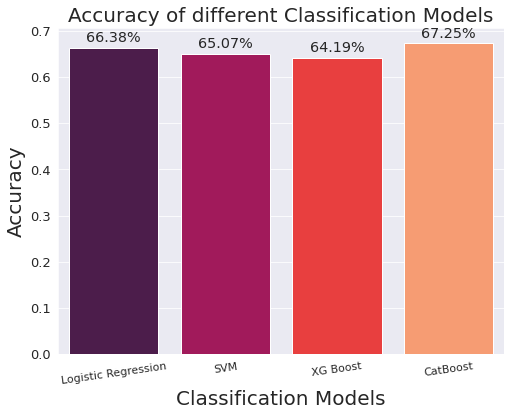

In [31]:
plt.rcParams['figure.figsize']=8,6
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "rocket", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()